# Mobile Price Classification

https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification/data



In [1]:
!pip install kagglehub

In [2]:
import kagglehub
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

In [3]:
path = kagglehub.dataset_download("iabhishekofficial/mobile-price-classification")

print("Path to dataset files:", path)

100%|██████████| 70.6k/70.6k [00:00<00:00, 30.5MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/iabhishekofficial/mobile-price-classification/versions/1


The imported dataset was divided into two parts: The first one, *train.csv*, contains the target variable *price_range*, which informs us to which price category a given phone belongs. The second one, 'test.csv', does not have such information and is intended for testing our model on new data.

In [4]:
data_file = os.path.join(path, 'train.csv')
data_file_test = os.path.join(path, 'test.csv')
df = pd.read_csv(data_file)
df_test = pd.read_csv(data_file_test)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc



**battery_power:** Total energy a battery can store in one time measured in mAh

**blue:** Has bluetooth or not

**clock_speed:** speed at which microprocessor executes instructions

**dual_sim:** Has dual sim support or not

**fc:** Front Camera mega pixels

**four_g:** Has 4G or not

**int_memory:** Internal Memory in Gigabytes

**m_dep:** Mobile Depth in cm

**mobile_wt:** Weight of mobile phone

**n_cores:** Number of cores of processor

**pc:** Primary Camera mega pixels

**px_height:** Pixel Resolution Height

**px_width:** Pixel Resolution Width

**ram:** Random Access Memory in Mega Bytes

**sc_h:** Screen Height of mobile in cm

**sc_w:** Screen Width of mobile in cm

**talk_time:** longest time that a single battery charge will last when you are talking on phone

**three_g:** Has 3G or not

**touch_screen:** Has touch screen or not

**wifi:** Has wifi or not

**price_range:** This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).


# Cleaning Data

We check if there are any missing properties in the given dataset

In [5]:
print(df.isnull().sum())

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


We also need to check if there are any duplicate rows, if so, we need to get rid of them.

In [6]:
print(df.duplicated().sum())

df = df.drop_duplicates()

0


# Data Exploration

In [7]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


As usual, simple use of the .describe() method gives us a lot of interesting information about the data contained in the dataset. We get information that on average we can talk for 5.46 hours on a single battery charge. The average screen height in centimeters is 4.35 and the average width is 4.2 cm. Looking at Min and Max, we can also identify categorical variables that take binary values. Let's save these variables in an array.

In [8]:
binary_cols = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']
binary_cols

['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']

Similarly, let's save the variables that take int values.

In [9]:
int_cols = []
for col in df.columns:
  if df[col].dtype == 'int64' and col not in binary_cols and col != 'price_range':
    int_cols.append(col)
int_cols

['battery_power',
 'fc',
 'int_memory',
 'mobile_wt',
 'n_cores',
 'pc',
 'px_height',
 'px_width',
 'ram',
 'sc_h',
 'sc_w',
 'talk_time']

Let's analyze the distribution of the target variable in 'train.csv'.

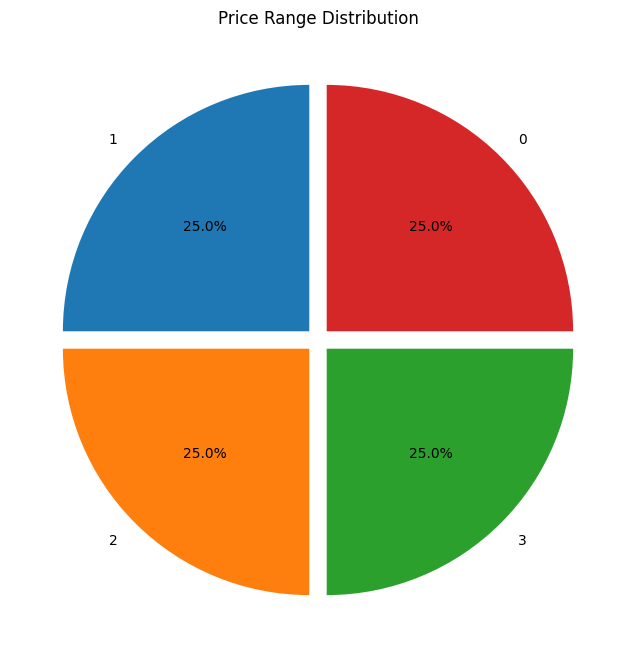

In [10]:
plt.figure(figsize=(8, 8))
df['price_range'].value_counts().plot(kind='pie', autopct='%1.1f%%',
                                      startangle=90, explode=[0.05] * 4)
plt.ylabel('')
plt.title('Price Range Distribution')
plt.show()

We obtain an even distribution of 25% for each category. This type of even distribution will make it easier to train our model to assign phones to these categories.

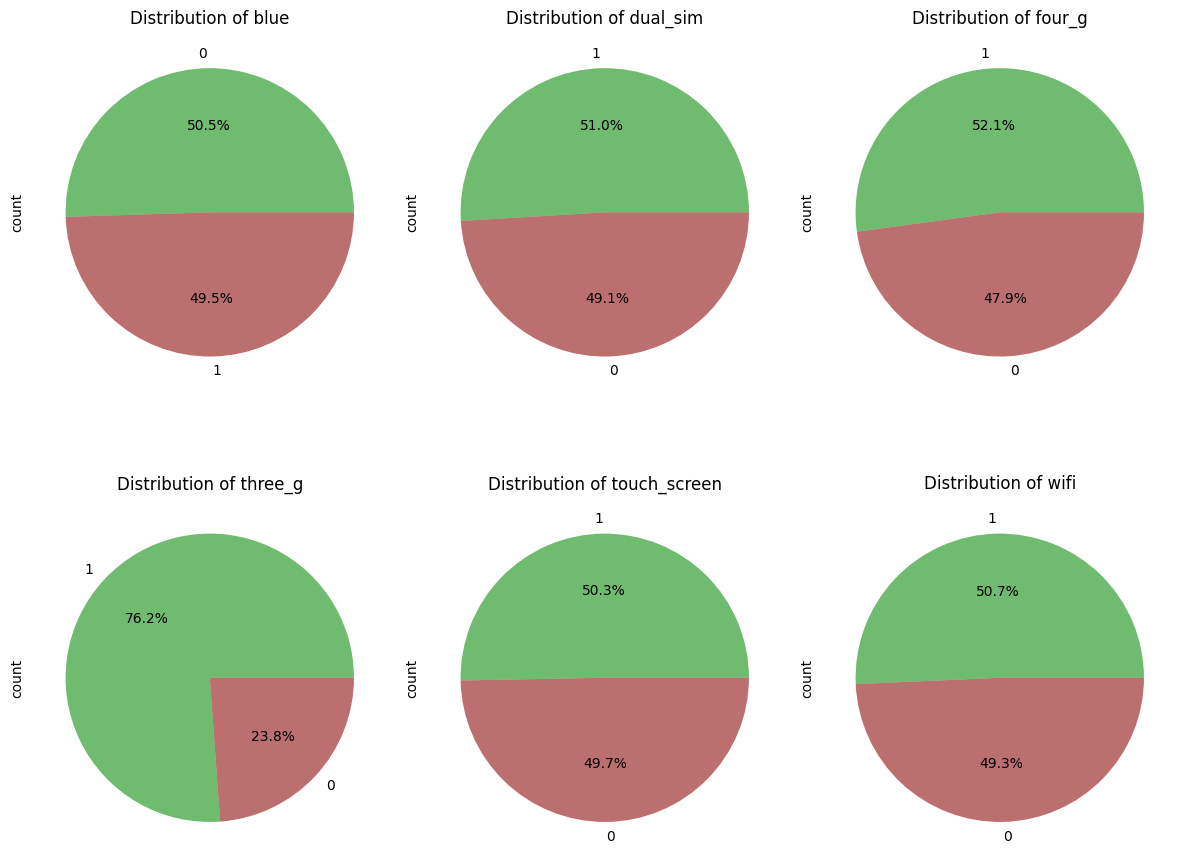

In [11]:

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 10))
axes = axes.flatten()

for i, col in enumerate(binary_cols):
  df[col].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#00880090', '#88000090'], ax=axes[i])
  axes[i].set_title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

The above pie charts show an even distribution of binary variables in the dataset. The only variable where the distribution is not around 50% is *three_g*. This variable tells us whether the phone has 3G. We see that about 76% of phones available in the database are equipped with this technology. This makes sense, as it has been a standard for many years.

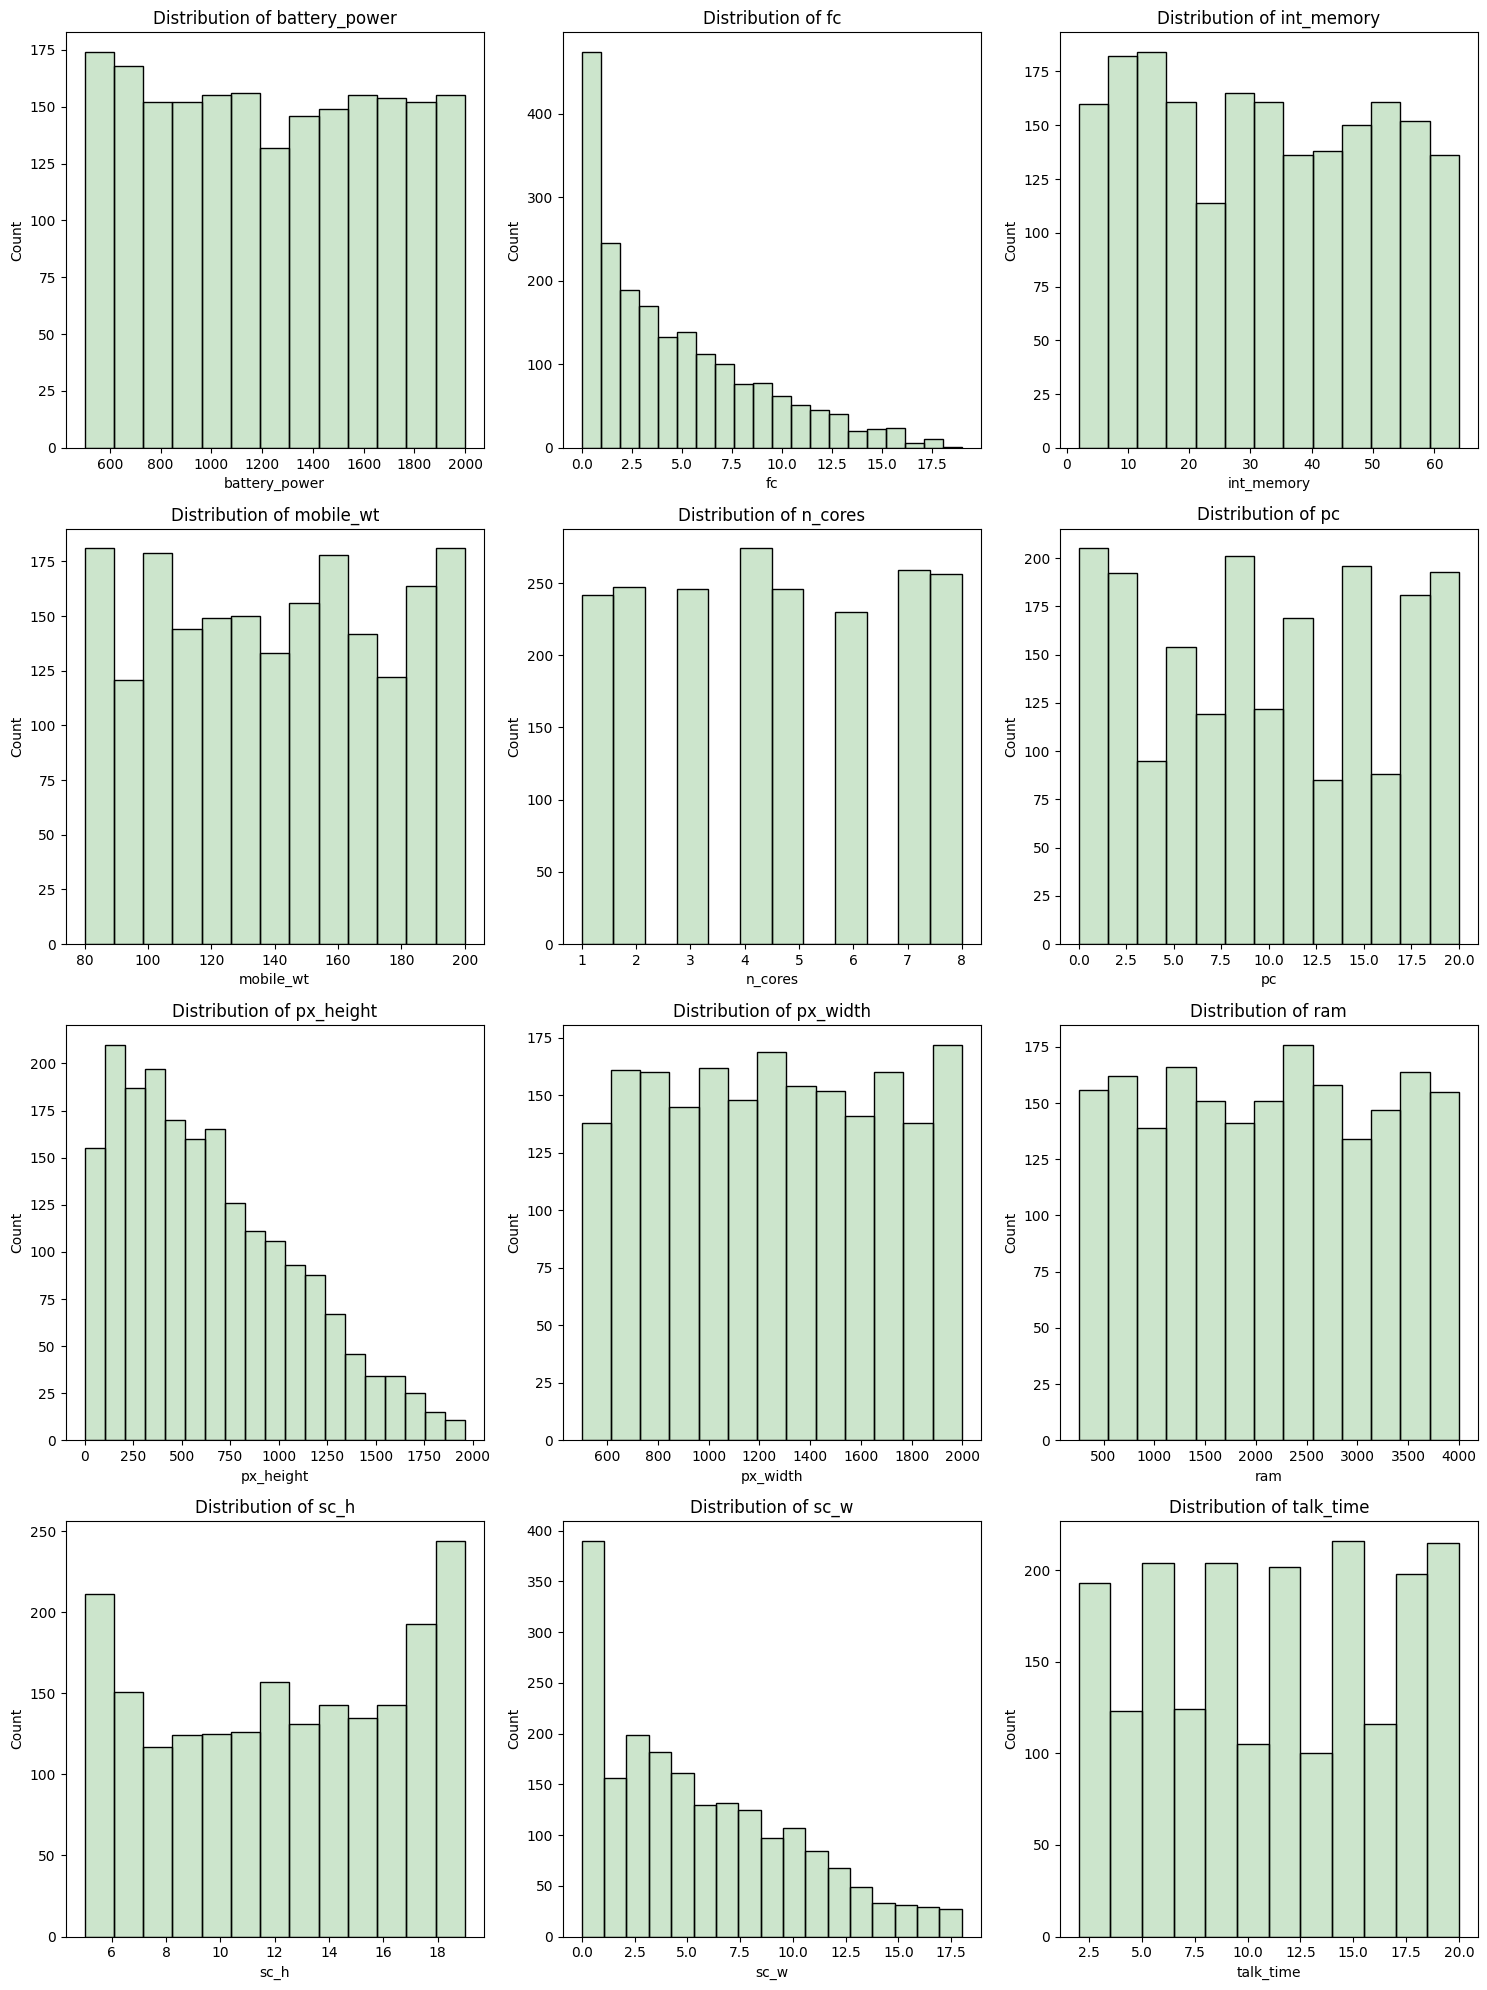

In [12]:
n_cols = 3
n_rows = (len(int_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

axes = axes.flatten()

for i, col in enumerate(int_cols):
    sns.histplot(df[col], ax=axes[i], color='g', alpha=0.2)
    axes[i].set_title(f'Distribution of {col}')

for i in range(len(int_cols), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

Analyzing the distribution of the remaining variables *(int type)*, we once again obtain an even distribution. The exceptions are the distributions of *fc*, *px_height*, and *sc_w*, which are right-skewed.

We have yet to analyze the distribution of the last two variables.

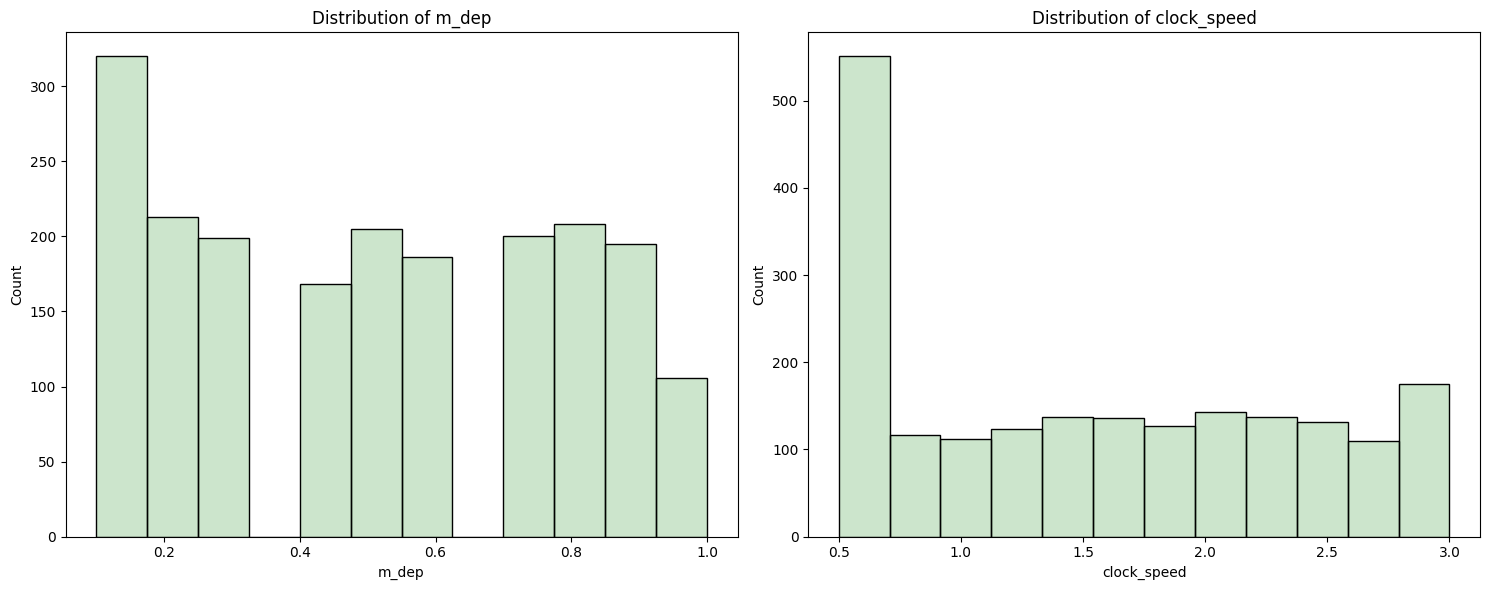

In [13]:

fig, axes = plt.subplots(1, 2, figsize=(15, 6))


for i, col in enumerate(['m_dep', 'clock_speed']):
    sns.histplot(df[col], ax=axes[i], color='g', alpha=0.2)
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

Again, we are dealing with a relatively even distribution, with a predominance of extremely low values.


Summarizing all distributions and the name of the file *'train'*, we can conclude that the data has been appropriately selected to facilitate the classification problem for the models.

# Correlation Between Features

Before we start preparing our model for the classification task, let's create a correlation matrix of the variables. It will help us select the variables on which we will perform the classification and will highlight variables with high correlation, based on which we will visualize the results of the model's operation.


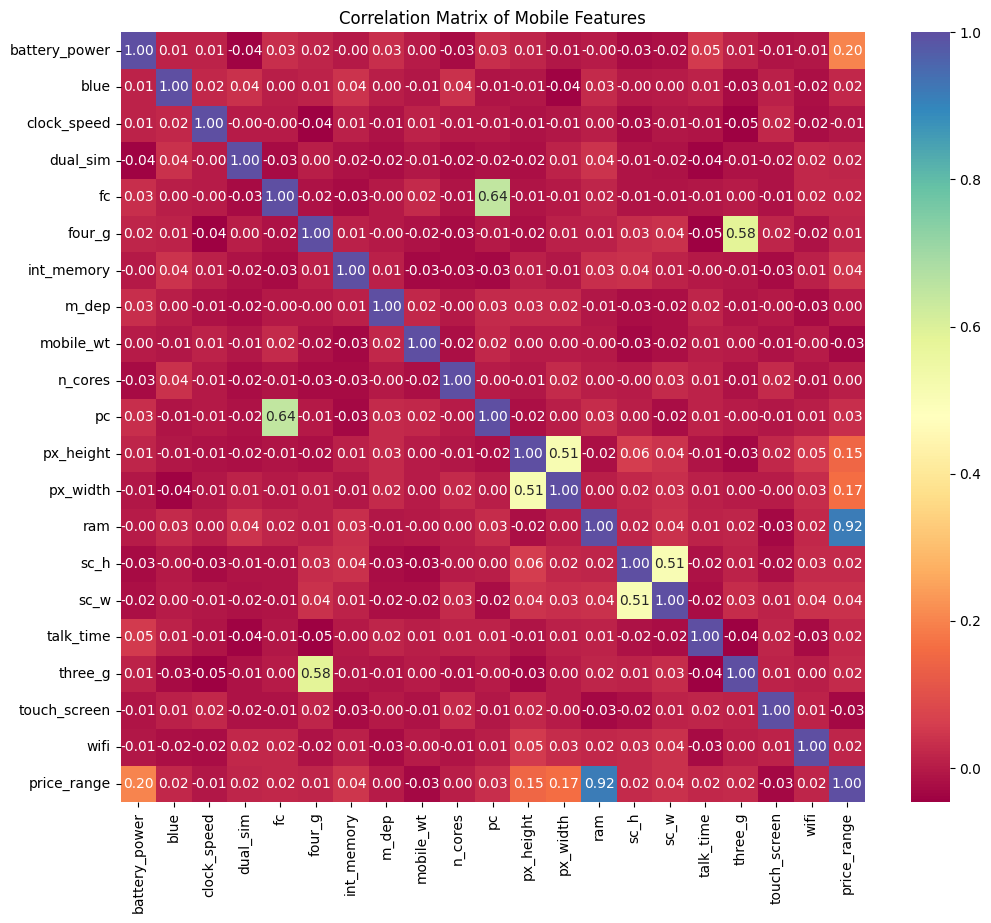

In [14]:
correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='Spectral', fmt=".2f")
plt.title('Correlation Matrix of Mobile Features')
plt.show()

The very strong correlation of *ram* to *price_range* is immediately apparent. We will perform the classification using variables with a correlation > 0.01 for *price_range*. We can also observe other obvious correlations here. For example, whether the phone supports 4G is related to whether it supports 3G. The megapixels of the main camera are related to the megapixels of the front camera.


In [15]:
high_corr = correlation_matrix.index[abs(correlation_matrix['price_range']) > 0.01].tolist()
X_high_corr = df[high_corr].drop('price_range', axis=1)
y = df['price_range']
print(high_corr)

['battery_power', 'blue', 'dual_sim', 'fc', 'four_g', 'int_memory', 'mobile_wt', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi', 'price_range']


We must remember to remove the target variable from the *X_high_corr* variable, otherwise, creating a classification model is pointless.


# Logistic Regression

For classification, we will use logistic regression. It predicts the probability of samples belonging to a given class.

In [16]:
X_high_corr.head()

,battery_power,blue,dual_sim,fc,four_g,int_memory,mobile_wt,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,0,1,0,7,188,2,20,756,2549,9,7,19,0,0,1
1,1021,1,1,0,1,53,136,6,905,1988,2631,17,3,7,1,1,0
2,563,1,1,2,1,41,145,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,0,0,0,10,131,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,0,13,1,44,141,14,1208,1212,1411,8,2,15,1,1,0


Originally, logistic regression is used for binary classification, but the one provided by the sklearn library automatically adjusts its behavior in the case of multi-class classification. In this case, the One-vs-Rest approach is used. The probability of belonging to each class is calculated and the highest probability is selected.

*StandardScaler* is crucial for this dataset to ensure that features with different scales are treated equally, prevent feature dominance, and optimize the performance of the Logistic Regression algorithm by creating a more balanced and informative feature space.

In [17]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_high_corr)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


We split the data into test and training data using *train_test_split* with the *test_size* parameter set to 0.2. As a result, 80% of the data is assigned to the training set and 20% to the test set.

In [18]:
y_train_pred = model.predict(X_train)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred, average='weighted')
test_recall = recall_score(y_test, y_pred, average='weighted')
test_f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Precision: {test_precision}")
print(f"Recall: {test_recall}")
print(f"Test F1 Score: {test_f1}")

Training Accuracy: 0.976875
Test Accuracy: 0.9775
Precision: 0.9781983509511138
Recall: 0.9775
Test F1 Score: 0.9775106815482141


We get high values of precision and accuracy so our model handles classification task pretty well.

We use *average='weighted'* it calculates the precision for each class separately and then averages the results, weighting them proportionally to the number of samples in each class.



*   **Accuracy:** measures the overall correctness of a model's predictions, representing the ratio of correctly classified instances to the total number of instances.
*   **Precision:** quantifies the proportion of correctly predicted positive instances out of all instances predicted as positive, focusing on the model's ability to avoid false positives.
*   **Recall:** also known as sensitivity, calculates the proportion of correctly predicted positive instances out of all actual positive instances, emphasizing the model's ability to identify all true positives.
*   **F1 Score:** score provides a balanced measure by considering both precision and recall, representing the harmonic mean of these two metrics and offering a comprehensive evaluation of the model's performance.





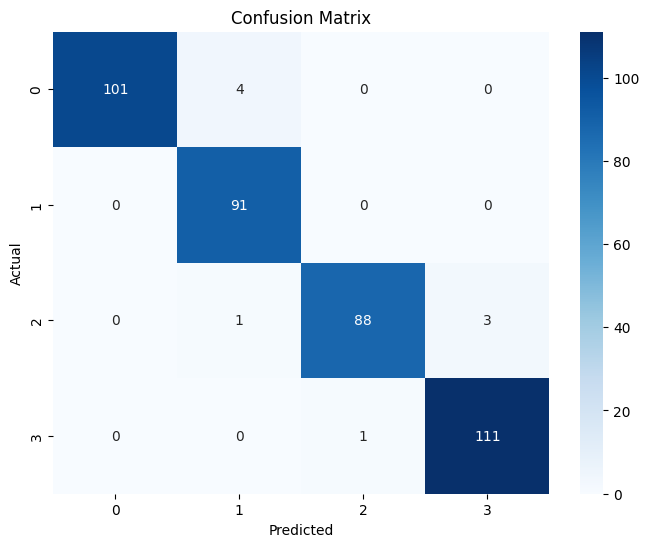

In [19]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['0', '1', '2', '3'], yticklabels=['0', '1', '2', '3'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

This confusion matrix shows us how our model classified. We can see here what mistakes it made. For example, when the actual class was 0, our model assigned it to class 1 four times.


# Using Model On Unseen Data

We have managed to obtain a fairly accurate model. Let's try to use it to classify the part of the data that it has not seen. Let's perform the classification for *'test.csv'*.


In [20]:
df_test = df_test[X_high_corr.columns]

X_test_scaled = scaler.transform(df_test)

y_pred_test = model.predict(X_test_scaled)

df_test['price_range'] = y_pred_test

<ipython-input-20-2fe64b7c279d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['price_range'] = y_pred_test


In [21]:
df_test.head()

,battery_power,blue,dual_sim,fc,four_g,int_memory,mobile_wt,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1043,1,1,14,0,5,193,16,226,1412,3476,12,7,2,0,1,0,3
1,841,1,1,4,1,61,191,12,746,857,3895,6,0,7,1,0,0,3
2,1807,1,0,1,0,27,186,4,1270,1366,2396,17,10,10,0,1,1,2
3,1546,0,1,18,1,25,96,20,295,1752,3893,10,0,7,1,1,0,3
4,1434,0,0,11,1,49,108,18,749,810,1773,15,8,7,1,0,1,1


We remember that we had the greatest correlation to price_range in ram and battery_power. Let's plot these two variables on a chart.


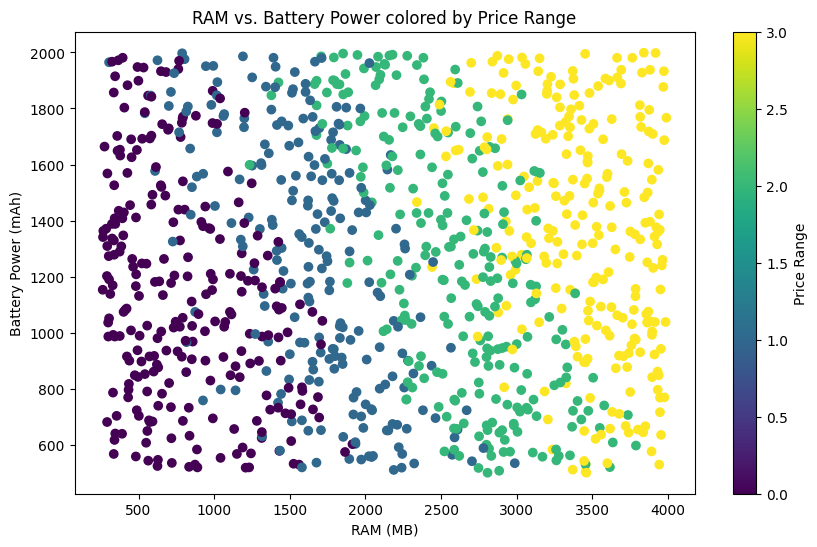

In [22]:

plt.figure(figsize=(10, 6))
plt.scatter(df_test['ram'], df_test['battery_power'], c=df_test['price_range'], cmap='viridis')
plt.xlabel('RAM (MB)')
plt.ylabel('Battery Power (mAh)')
plt.title('RAM vs. Battery Power colored by Price Range')
plt.colorbar(label='Price Range')
plt.show()

This graph shows that our data has been correctly classified. If you look closely, as the ram increases, we move to higher and higher price ranges. The correlation of price_range with battery power is visible in the fact that bands of the same color are tilted to the left.
